LAMMPS (2 Aug 2023 - Update 3)
Total wall time: 0:00:51
Reading data file ...
  orthogonal box = (0 0 0) to (10.388155 10.388155 10.388155)
  1 by 1 by 1 MPI processor grid
  reading atoms ...
  96 atoms
  read_data CPU = 0.001 seconds

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Your simulation uses code contributions which should be cited:
- pair reaxff command: doi:10.1016/j.parco.2011.08.005
- fix qeq/reaxff command: doi:10.1016/j.parco.2011.08.005
The log file lists these citations in BibTeX format.

CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE-CITE

Switching to 'neigh_modify every 1 delay 0 check yes' setting during minimization
Neighbor list info ...
  update: every = 1 steps, delay = 0 steps, check = yes
  max neighbors/atom: 2000, page size: 100000
  master list distance cutoff = 12
  ghost atom cutoff = 12
  binsize = 6, bins = 2 2 2
  2 neighbor lists, perpetual/occasional/extra = 2 0 0
  (1) pair reax/c, perpetual
      attributes: half

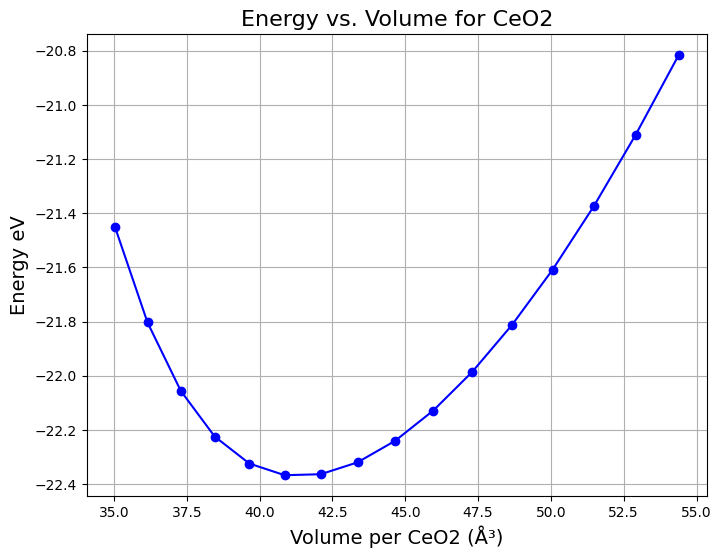

In [2]:
import matplotlib.pyplot as plt
from lammps import lammps
import numpy as np

import os

# Directory where the plot will be saved
plot_directory = 'energy_volume_with_efield/'

# Check if the directory exists, and create it if it does not
if not os.path.exists(plot_directory):
    os.makedirs(plot_directory)

# Define the path to the shell script
input_file_path = 'run-lammps-reax-c.sh'
#input_file_path = 'run-lammps.sh' # For the original fortran/reax force field

conv = 0.0433641 # kcal/mol to eV
nCeO2 = 32 # Number of CeO2 in the simulation

data_per_e_field = {}

volumes_per_CeO2 = []
energies_per_CeO2 = []

for i in np.arange(0.95, 1.10, 0.01):
    # Read the content of the file
    with open(input_file_path, 'r') as file:
        lines = file.readlines()

    # Modify the specific line
    with open(input_file_path, 'w') as file:
        for line in lines:
            if line.strip().startswith('read_data'):
                file.write(f'read_data data_{i:.2f}.CeO2\n')
            else:
                file.write(line)

    lmp = lammps()
    try:
        lmp.file(input_file_path)

        volume = lmp.get_thermo("vol")
        volume_per_CeO2 = volume / nCeO2
        volumes_per_CeO2.append(volume_per_CeO2)

        E_CeO2 = lmp.get_thermo("pe") * conv / nCeO2
        energies_per_CeO2.append(E_CeO2)
    except:
        print(f'Error at volume {i:.2f}')
        continue

min_value = min(energies_per_CeO2)

# Subtract the minimum value from each element using list comprehension
energies_per_CeO2 = [x - min_value for x in energies_per_CeO2]

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(volumes_per_CeO2, energies_per_CeO2, '-o', color='blue')
plt.xlabel('Volume per CeO2 (Å³)', fontsize=14)
plt.ylabel('Energy eV', fontsize=14)
plt.title('Energy vs. Volume for CeO2', fontsize=16)
plt.grid(True)
#plt.savefig(f'{plot_directory}energy_vs_volume_reaxc.png')
plt.savefig(f'{plot_directory}energy_vs_volume.png')